# Project: Investigate a Dataset - TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I choose the TMDb 5000 movie dataset for analysis. This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

I will be using the following columns from the dataset (listed with their significance): 

| Column Name | Significance |
| :--- | :--- |
| popularity | "Lifetime" popularity score on TMDb, not just at the box office. |
| original_title | Movie's title |
| runtime | Movie length in minutes |
| genres | Themed categories classifying all movies. |
| release_year | Year the movie opened into Theatres. |
| budget_adj | Movie's budget adjusted to current value with inflation. |
| revenue_adj | Movie's revenue adjusted to current value with inflation. |

I will add 'profit' from revenue_adj - budget_adj

### Question(s) for Analysis
1. Which Movies are the most profitable?
2. Which Movies are the most popular?
3. Are movies getting longer? Average Runtime Of Movies From Year To Year
4. Which Genre Has The Highest Release Of Movies? 




In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Defining the columns to read - excluding the rest to load dataset faster & save parsing time
# load csv file data into data frame

usecols = ["popularity", "original_title", "runtime", "genres", "release_year", "budget_adj", "revenue_adj"]
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv', usecols=usecols)

# display first five rows of data
df.head(5)

,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09



### Data Cleaning

First we will gather basic information about the dataset to look for missing data, duplicates, or incorrect data types. 

#### Check for Incorrect Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   release_year    10866 non-null  int64  
 5   budget_adj      10866 non-null  float64
 6   revenue_adj     10866 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 594.4+ KB


#### Check for Null or Empty fields

In [4]:
# Check for Missing values
df.isnull().sum()

popularity         0
original_title     0
runtime            0
genres            23
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

#### Check for Duplicates

In [5]:
# check for duplicated rows
df.duplicated().sum()

1

### Cleaning Fix Results

We see there are a max of 10866 entries per column, with 'Genres' returning only 10843, indicating that there were 23 missing genre data fields. The null values were replaced with 0 and then those rows were dropped. 

The 'Popularity', 'Budget_Adj' and 'Revenue_Adj' data were loaded as the incorrect data types and were all converted into the desired Integer format.

#### Fix / Drop Duplicate Rows

In [6]:
# drop duplicates
df = df.drop_duplicates(keep=False)
df.duplicated().sum()

0

#### Fix Missing Data

In [7]:
# Fill the null values with zero. Check again

df.fillna(0, inplace = True)

In [8]:
# verify no remaining null values
df.isnull().sum()

popularity        0
original_title    0
runtime           0
genres            0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [13]:
# Drop rows with zero values in genres
# Drop rows with zero revenue_adj values

df['genres'] = df['genres'].replace(0, np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)

df.dropna(inplace =True)

#### Fix Incorrect Data Types

In [10]:
# Fix incorrect data types: Change popularity, budget_adj and revneue_adj to integers
df['popularity'] = df['popularity'].astype(int)
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4848 entries, 0 to 10848
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   popularity      4848 non-null   int64 
 1   original_title  4848 non-null   object
 2   runtime         4848 non-null   int64 
 3   genres          4848 non-null   object
 4   release_year    4848 non-null   int64 
 5   budget_adj      4848 non-null   int64 
 6   revenue_adj     4848 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 303.0+ KB


In [12]:
# Cleaned Database shape (Rows, Columns)
df.shape

(4848, 7)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - Which movies are the most profitable?

In [14]:
# Create new column for the profit to find out which movie is more profitable.

In [15]:
df['profit'] = (df['revenue_adj'] - df['budget_adj']) / 1000000000
df.rename(columns={'profit': 'profit - $ Billion'}, inplace=True)
df.head(1)

,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj,profit - $ Billion
0,32,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,137999939,1392445892,1.254446


In [16]:
# Sort the data by profit and show the top 20 rows.
df.sort_values(['profit - $ Billion'], ascending = False).head(20)

,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj,profit - $ Billion
1329,12,Star Wars,121,Adventure|Action|Science Fiction,1977,39575591,2789712242,2.750137
1386,9,Avatar,162,Action|Adventure|Fantasy|Science Fiction,2009,240886902,2827123750,2.586237
5231,4,Titanic,194,Drama|Romance|Thriller,1997,271692064,2506405735,2.234714
10594,2,The Exorcist,122,Drama|Horror|Thriller,1973,39289276,2167324901,2.128036
9806,2,Jaws,124,Horror|Thriller|Adventure,1975,28362748,1907005841,1.878643
8889,2,E.T. the Extra-Terrestrial,115,Science Fiction|Adventure|Family|Fantasy,1982,23726245,1791694309,1.767968
3,11,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,183999919,1902723129,1.718723
8094,1,The Net,114,Crime|Drama|Mystery|Thriller|Action,1995,31481271,1583049536,1.551568
10110,2,One Hundred and One Dalmatians,79,Adventure|Animation|Comedy|Family,1961,29179444,1574814739,1.545635
7309,5,The Empire Strikes Back,124,Adventure|Action|Science Fiction,1980,47628661,1424626187,1.376998


**Star Wars** holds 4 / 20 top spots! 
9 / 20 of the top spots are in the **Science Fiction** genre. 
14 / 20 of the top spots are in the **Adventure** genre.

This will definitely have an impact on the most profitable Genre as well.

### Research Question 2 - Which Movies are the most popular?

In [17]:
# Sort the data by popularity and show the top 20 rows.
df.sort_values(['popularity'], ascending = False).head(20)

,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj,profit - $ Billion
0,32,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,137999939,1392445892,1.254446
1,28,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,137999939,348161292,0.210161
629,24,Interstellar,169,Adventure|Drama|Science Fiction,2014,151980023,572690645,0.420711
630,14,Guardians of the Galaxy,121,Action|Science Fiction|Adventure,2014,156585478,712291130,0.555706
2,13,Insurgent,119,Adventure|Science Fiction|Thriller,2015,101199955,271619025,0.170419
631,12,Captain America: The Winter Soldier,136,Action|Adventure|Science Fiction,2014,156585478,658365092,0.501780
1329,12,Star Wars,121,Adventure|Action|Science Fiction,1977,39575591,2789712242,2.750137
3,11,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,183999919,1902723129,1.718723
632,11,John Wick,101,Action|Thriller,2014,18421821,72526614,0.054105
633,10,The Hunger Games: Mockingjay - Part 1,123,Science Fiction|Adventure|Thriller,2014,115136381,692752790,0.577616


**Surprisingly, there's not a lot of overlap between the most popular and most profitable movies...** Since most profitable is the difference of their total revenue vs their initial budget, it goes to say that the more popular a movie is the more revenue it will have and thereby the more profitable. 

### Research Question 3  - Are movies getting longer? Avg/Mean Runtime Of Movies From Year To Year

In [18]:
# First group movie runtime by each years
runtime_year = df.groupby('release_year')['runtime'].mean()
runtime_year.head(5)


release_year
1960    118.000000
1961    132.500000
1962    135.666667
1963    148.000000
1964    119.875000
Name: runtime, dtype: float64

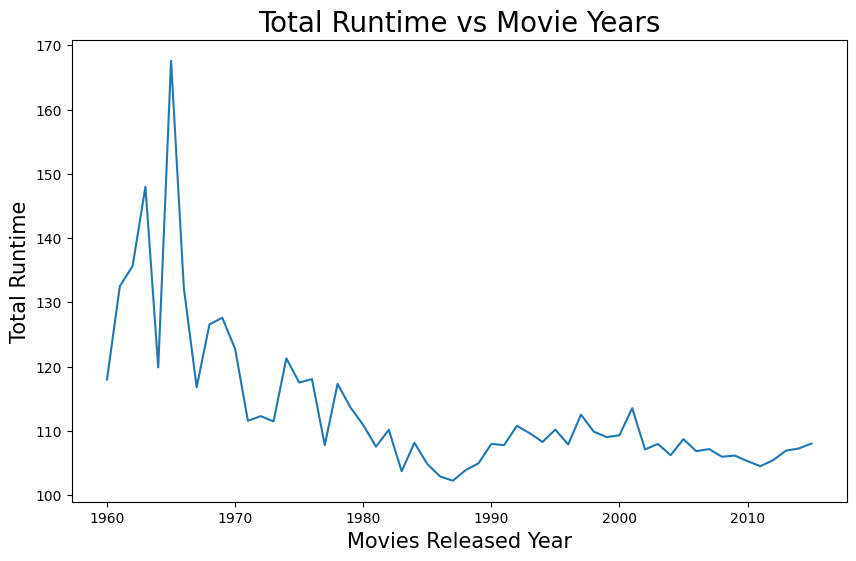

In [19]:
# plot the above query.
runtime_year.plot(figsize = (10,6))
plt.xlabel('Movies Released Year', fontsize = 15)
plt.ylabel('Total Runtime', fontsize = 15)
plt.title('Total Runtime vs Movie Years', fontsize = 20);

Interpreting this data, our attention spans have definitely gotten shorter, thereby so has our movies.

### Research Question 4  - Which Genre Has The Highest Release Of Movies?

In [21]:
# function to split the string and return the count of each genre
def count_genre(x):
    #concatenate all the rows of the genres
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #count each of the genres and return
    info = data.value_counts(ascending=False)
    return info

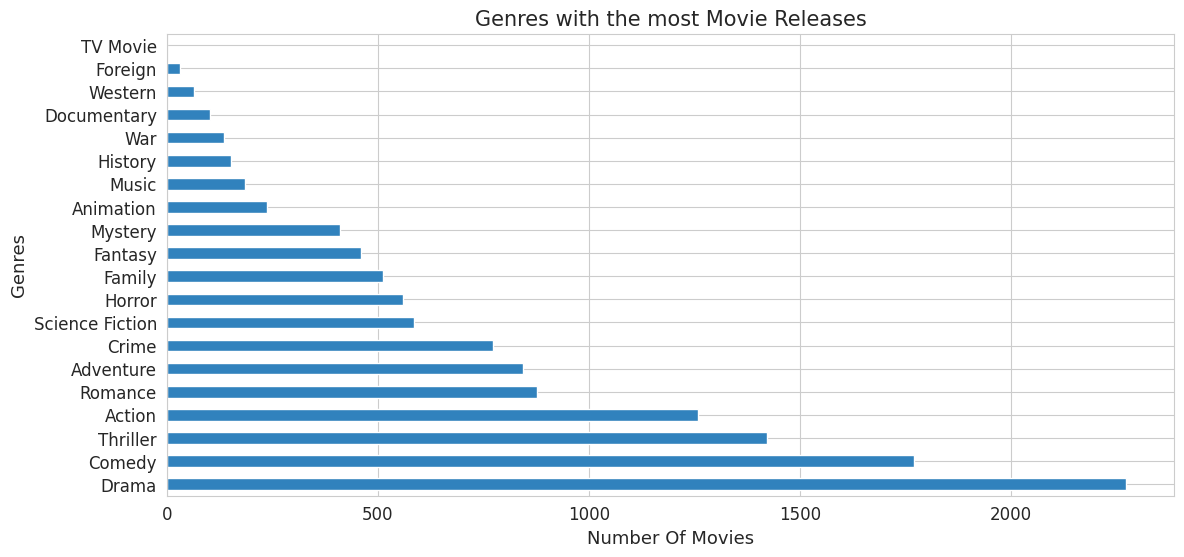

In [24]:
# call the function for counting total movies per genre
total_genre_movies = count_genre('genres')

# plot a horizontal bar plot using plot function
# Genres vs Number of Movies
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

# Set the title and the labels of the plot
plt.title("Genres with the most Movie Releases",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

According to the bar chart, the Drama genre has the highest release of movies followed by Comedy, Thriller and Action. This however doesn't take into consideration a movie being categorized into multiple genres. It does though illude to why a movie that has Drama and Comedy, also known as a "Dramady" are so prevalent.

<a id='conclusions'></a>
## Conclusions

The massive 10000 film databse had to be wrangled down to make it usable for my explorations. After choosing my questions to explore, I chose to save resources and only load the columns I intended to analyze from the start. After removing duplicates, missing data and adjusting incorrect datatypes, the usable database was about half the size at 4848 rows and 7 columns. 

There was not a significant overlap between the most profitable movies and the most popular movies... I hypothesized the top 20 results would be near identical, as Profit is directly impacted by the popularity of a movie - though it's also directly affected by the movie's initial budget - however meager or inflated it is. 70% of the films on the most profitable list were released more than 20 yrs ago. Can a recent movie be profitable and popular at the same time? Are the expensive special effects and CGI in modern films necessary for top profits or more often than not are they the downfall of a film's profit margin? More exploration is needed into the recent films to find their limitation factors.

The declining movie runtime over the years makes sense to me as it relates to our increasingly busy lives and limited attention spans. Further exploration into the 'sweet spot' of runtime vs profit is needed to discover if such exists for the ideal movie formula.

**Sources:**

- Pandas documentation
- Kaggle TMDB guide
- TMDB developer guide


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [26]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 463881 bytes to Investigate_a_Dataset.html
